<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_04_KMeans_Clustering/Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Quantization

Install OpenCV packages:

In [ ]:
pip install opencv-python opencv-contrib-python opencv-python-headless

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


In [ ]:
def get_distinct_colours(image):
    unique, counts = np.unique(
                      image.reshape(-1, image.shape[-1]),
                      axis=0, return_counts=True)
    return counts.size

def color_quantization(image, clusters):
    X = image.reshape((-1,3))
    X = np.float32(X)
    criteria = (cv2.TERM_CRITERIA_EPS + 
                cv2.TERM_CRITERIA_MAX_ITER, 
                10, 1.0)
    ret,label,center=cv2.kmeans(X, clusters, None, 
                                criteria, 10,
                                cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape((image.shape))
    return result

## A sample color palette

the below code is modified from 
https://matplotlib.org/stable/gallery/color/named_colors.html

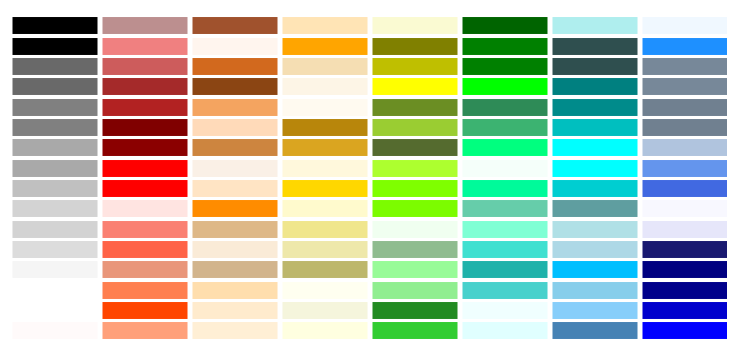

In [ ]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 8
# nrows = n // ncols
nrows = 16

fig, ax = plt.subplots(figsize=(10, 8))
canvas = FigureCanvasAgg(fig)

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    row = i % nrows
    col = i // nrows
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 1.0)
    xi_text = w * (col + 0.3)

    # ax.text(xi_text, y, name, fontsize=(h * 0.8),
    #         horizontalalignment='left',
    #         verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.5))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()
ax.margins(0)

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0.4,
                    hspace=0, wspace=0)
# plt.savefig("color_paltte.png", format="png", dpi=600, transparent=True, bbox_inches='tight')
plt.show()

canvas.draw() 
color_palette = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
color_palette = color_palette.reshape(canvas.get_width_height()[::-1] + (3,))

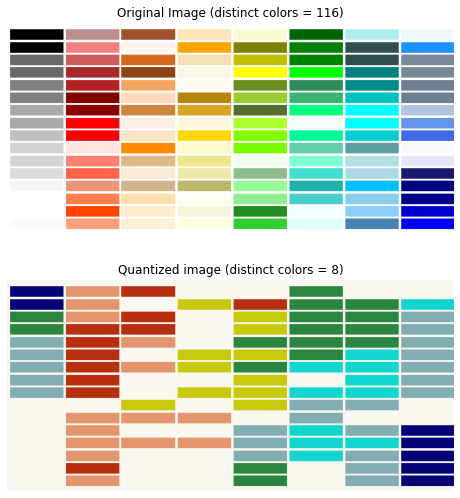

In [ ]:
# color_palette = cv2.imread('color_palette.png')
color_palette = color_palette[0:340, :] 
dist_color = get_distinct_colours(color_palette)
fig = plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.title(f"Original Image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(color_palette)
# plt.savefig("color_palette.svg", format="svg", transparent=True, bbox_inches='tight')
# plt.show()

k = 8
img_k8 = color_quantization(color_palette, k)
dist_color = get_distinct_colours(img_k8)
# fig = plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k8)
plt.subplots_adjust(hspace=-0.35)
plt.savefig("color_palette_Quantized.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## Color Wheel, for color quantization

Generate a color wheel:

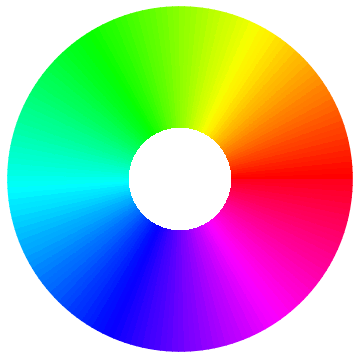

In [ ]:
fig = plt.figure(figsize=(6,6))
canvas = FigureCanvasAgg(fig)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='polar')
colormap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(0.0, 2*np.pi)
n = 180
t = np.linspace(0, 2*np.pi, n)
r = np.linspace(0.3, 1)
rg, tg = np.meshgrid(r, t)
c = tg
im = ax.pcolormesh(t, r, c.T, norm=norm, cmap=colormap)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines['polar'].set_visible(False)
# plt.savefig("color_wheel.png", format="png", transparent=True, bbox_inches='tight')
plt.show()

canvas.draw() 
color_wheel = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
color_wheel = color_wheel.reshape(canvas.get_width_height()[::-1] + (3,))

Apply K-Means on the color wheel for color quantization for $k = 32, 16, 8$

Display:

> Original Image
>
> Quantized image fro $k=32$
>
> Quantized image fro $k=16$
>
> Quantized image fro $k=8$

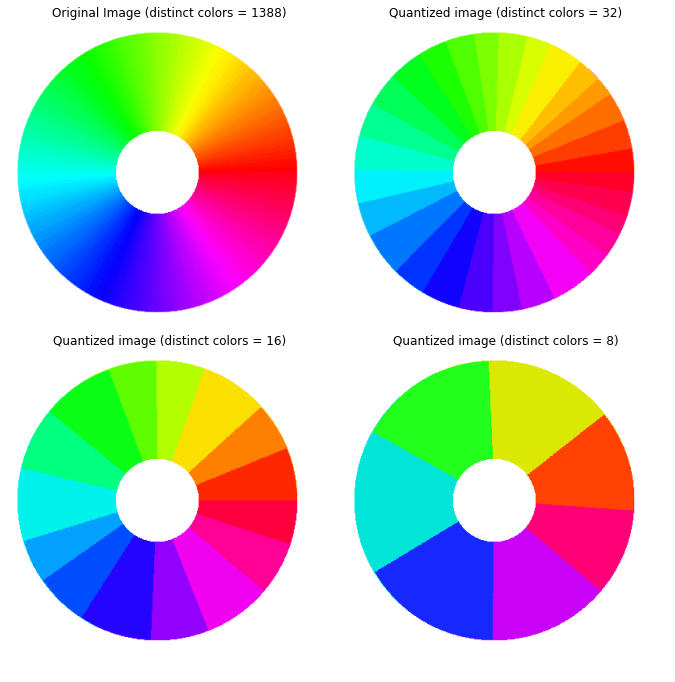

In [ ]:
color_wheel_cropped = color_wheel[30:500, 30:500] 
dist_color = get_distinct_colours(color_wheel_cropped)
fig = plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title(f"Original Image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(color_wheel_cropped)

k = 32
img_k32 = color_quantization(color_wheel_cropped, k)
dist_color = get_distinct_colours(img_k32)
plt.subplot(2, 2, 2)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k32)

k = 16
img_k16 = color_quantization(color_wheel_cropped, k)
dist_color = get_distinct_colours(img_k16)
plt.subplot(2, 2, 3)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k16)

k = 8
img_k8 = color_quantization(color_wheel_cropped, k)
dist_color = get_distinct_colours(img_k8)
plt.subplot(2, 2, 4)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k8)
plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.savefig("color_wheel_Quantized.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## An Image, for color quantization

Load a sample image from sklearn.datasets and apply K-Means for color quantization. 

Display:

> Original Image
>
> Quantized image for $k=32$
>
> Quantized image for $k=16$
>
> Quantized image for $k=8$

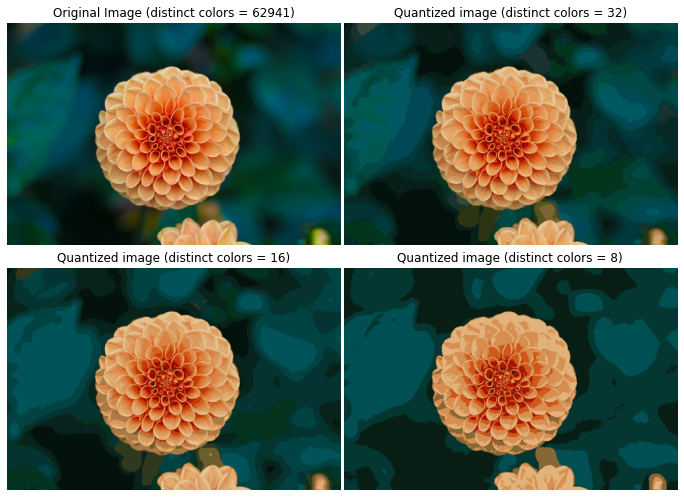

In [ ]:
img = load_sample_image("flower.jpg")
dist_color = get_distinct_colours(img)
fig = plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title(f"Original Image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img)

k = 32
img_k32 = color_quantization(img, k)
dist_color = get_distinct_colours(img_k32)
plt.subplot(2, 2, 2)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k32)

k = 16
img_k16 = color_quantization(img, k)
dist_color = get_distinct_colours(img_k16)
plt.subplot(2, 2, 3)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k16)

k = 8
img_k8 = color_quantization(img, k)
dist_color = get_distinct_colours(img_k8)
plt.subplot(2, 2, 4)
plt.title(f"Quantized image (distinct colors = {dist_color})")
plt.axis('off')
plt.imshow(img_k8)
plt.subplots_adjust(wspace=0.01, hspace=-0.4)
plt.savefig("image_Quantized.svg", format="svg", transparent=True, bbox_inches='tight')
plt.savefig("image_Quantized.png", format="png", transparent=True, bbox_inches='tight')
plt.show()